In [5]:
import pandas as pd
import os

# merging 12 months of sales data into a single file

In [6]:
df = pd.read_csv("./Sales_data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]  

all_months_data = pd.DataFrame()


for file in files:
    df = pd.read_csv("./Sales_Data/"+file,encoding='ISO-8859-1')
    all_months_data = pd.concat([all_months_data, df],ignore_index=True,)


all_months_data.to_csv("all_data.csv", index=False)




In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


# Clean up the Data

#drop rows of NAN

In [8]:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


#find 'Or and delete it

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#drop rows of NAN

In [10]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


#drop column 

In [11]:
all_data = all_data.drop('Unnamed: 0', axis=1)



#Convert columns to the correct type

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

In [13]:
#identificando o tipo de coluna do df
tipos_de_colunas = all_data.dtypes
print(tipos_de_colunas)


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


#Augment data with additional columns

# Task 2: Add Month Column

In [14]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')


In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# Task 3 Add a sales column

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


# Question 1 : What was the best month for sales? How much was earned that month?

In [17]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [18]:
results = all_data.groupby('Month').sum()


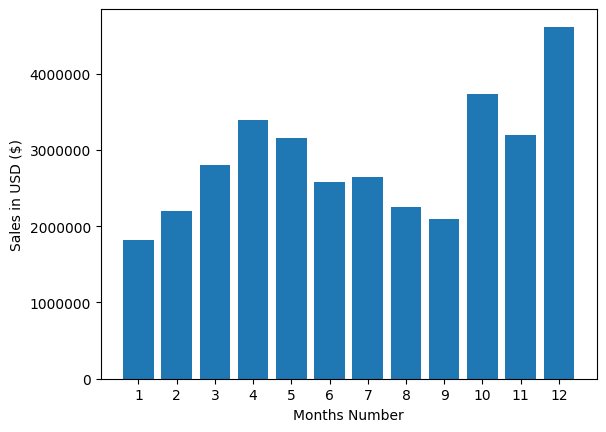

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    return int(value)

months = range(1,13)

plt.bar(months,results['Sales'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months Number')


plt.show()


# QUESTION 2 :  What CITY had the highest number of sales - Qual a cidade tem o maior numero de vendas?

In [20]:
def extract_city(address):
    return address.split(",")[1].strip()

def extract_state(address):
    return address.split(",")[2].strip().split(" ")[0].strip()



def extract_street(address):
    # Dividir o endereço usando a vírgula como delimitador
    parts = address.split(",")
    # A primeira parte é o número e o nome da rua
    street = parts[0].strip()
    # Remover o número do início da rua
    street_name = " ".join(street.split(" ")[1:])
    return street_name

# Criar a nova coluna "City"
all_data['City'] = all_data['Purchase Address'].apply(extract_city)
all_data['State'] = all_data['Purchase Address'].apply(extract_state)
all_data['Street']= all_data['Purchase Address'].apply(extract_street)



all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St


In [21]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City1'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [22]:
results2 = all_data.groupby('City1').sum()
results2.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street
City1,,,,,,,,,,,
Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58,AtlantaAtlantaAtlantaAtlantaAtlantaAtlantaAtla...,GAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,Hill St12th StPine St10th St10th StWilson St4t...
Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75,AustinAustinAustinAustinAustinAustinAustinAust...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,Main StRiver StJefferson StJefferson StCherry ...
Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01,BostonBostonBostonBostonBostonBostonBostonBost...,MAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMAMA...,Pine StElm StElm StElm StElm StRidge StLincoln...
Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40,DallasDallasDallasDallasDallasDallasDallasDall...,TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...,Hickory StWilson St7th StLincoln St2nd StPine ...
Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80,Los AngelesLos AngelesLos AngelesLos AngelesLo...,CACACACACACACACACACACACACACACACACACACACACACACA...,Lincoln StPark StJohnson StCherry StHill StHic...
New York City (NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43,New York CityNew York CityNew York CityNew Yor...,NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...,Church St2nd StMain StJefferson St1st St1st St...
Portland (ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,447189.25,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,449758.27,PortlandPortlandPortlandPortlandPortlandPortla...,MEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEMEME...,Maple StWashington St12th StDogwood StMeadow S...
Portland (OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,1860558.22,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,1870732.34,PortlandPortlandPortlandPortlandPortlandPortla...,OROROROROROROROROROROROROROROROROROROROROROROR...,12th StElm StJackson StLake StHighland StJeffe...
San Francisco (CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91,San FranciscoSan FranciscoSan FranciscoSan Fra...,CACACACACACACACACACACACACACACACACACACACACACACA...,6th St1st StLake StChurch StRidge StLake StHic...


In [23]:
city_counts = all_data['City1'].value_counts()
print(city_counts)

City1
San Francisco (CA)    44732
Los Angeles (CA)      29605
New York City (NY)    24876
Boston (MA)           19934
Atlanta (GA)          14881
Dallas (TX)           14820
Seattle (WA)          14732
Portland (OR)         10010
Austin (TX)            9905
Portland (ME)          2455
Name: count, dtype: int64


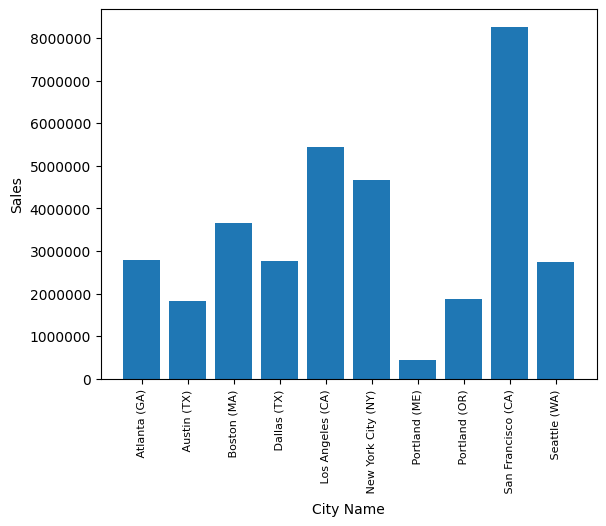

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    return int(value)



cities = [city for city, df in all_data.groupby('City1')]

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.bar(cities,results2['Sales'])
plt.xticks(cities, rotation = 'vertical',size =8)
plt.ylabel('Sales')
plt.xlabel('City Name')
plt.show()

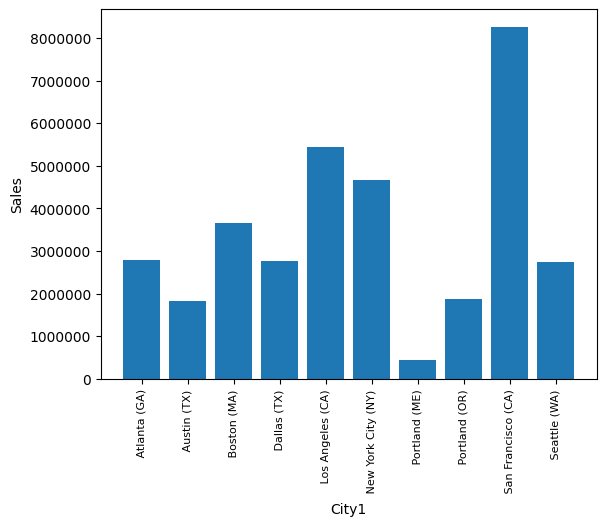

In [25]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City1')]

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.bar(cities,results2['Sales'])
plt.xticks(cities, rotation = 'vertical',size =8)
plt.ylabel('Sales')
plt.xlabel('City1')
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of curstomers buying product?

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street,City1
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St,Atlanta (GA)


In [27]:
# Converter a coluna 'Order Date' para datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Verificando o tipo de dado após a conversão
print(all_data.dtypes)


/var/folders/l2/ynd32wzj36vf6_17bh6t4y5r0000gn/T/ipykernel_10219/1810258840.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
State                       object
Street                      object
City1                       object
dtype: object


In [28]:
# Extrair a data
all_data['date'] = all_data['Order Date'].dt.date

# Extrair o horário
all_data['time'] = all_data['Order Date'].dt.time



In [29]:
all_data.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street,City1,date,time
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St,New York City (NY),2019-12-30,00:01:00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St,New York City (NY),2019-12-29,07:03:00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St,New York City (NY),2019-12-12,18:21:00
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St,San Francisco (CA),2019-12-22,15:13:00
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St,Atlanta (GA),2019-12-18,12:38:00
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,NY,Jefferson St,New York City (NY),2019-12-31,22:58:00
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,OR,12th St,Portland (OR),2019-12-16,15:10:00
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,TX,Hickory St,Dallas (TX),2019-12-13,09:29:00
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,TX,Wilson St,Dallas (TX),2019-12-15,23:26:00
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,TX,7th St,Dallas (TX),2019-12-28,11:51:00


In [30]:
# Extrair a hora da coluna 'Order Date'
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


In [31]:
all_data.head(30)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street,City1,date,time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St,New York City (NY),2019-12-30,00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St,New York City (NY),2019-12-29,07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St,New York City (NY),2019-12-12,18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St,San Francisco (CA),2019-12-22,15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St,Atlanta (GA),2019-12-18,12:38:00,12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,NY,Jefferson St,New York City (NY),2019-12-31,22:58:00,22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,OR,12th St,Portland (OR),2019-12-16,15:10:00,15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,TX,Hickory St,Dallas (TX),2019-12-13,09:29:00,9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,TX,Wilson St,Dallas (TX),2019-12-15,23:26:00,23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,TX,7th St,Dallas (TX),2019-12-28,11:51:00,11,51


In [32]:
sales_by_hour = all_data.groupby('Hour').size()
sales_by_hour.head(100)

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64

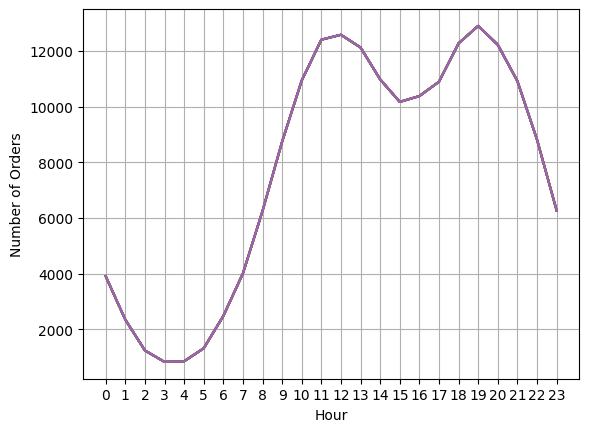

In [33]:

import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

# Question 4: What products are most often sold together?



In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street,City1,date,time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St,New York City (NY),2019-12-30,00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St,New York City (NY),2019-12-29,07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St,New York City (NY),2019-12-12,18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St,San Francisco (CA),2019-12-22,15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St,Atlanta (GA),2019-12-18,12:38:00,12,38


In [35]:
all_data['Product'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Macbook Pro Laptop
1             LG Washing Machine
2           USB-C Charging Cable
3               27in FHD Monitor
4           USB-C Charging Cable
                   ...          
186847    AAA Batteries (4-pack)
186848          27in FHD Monitor
186849      USB-C Charging Cable
186850      USB-C Charging Cable
186851    AAA Batteries (4-pack)
Name: Product, Length: 185950, dtype: object>

In [36]:
produtos_distintos = all_data['Product'].nunique()
print(produtos_distintos)

19


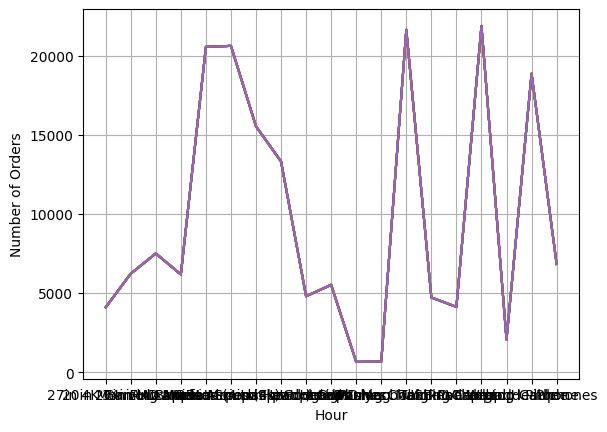

In [37]:
import matplotlib.pyplot as plt

products = [product for product, df in all_data.groupby('Product')]

plt.plot(products, all_data.groupby(['Product']).count())
plt.xticks(products)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

In [38]:
from itertools import combinations
from collections import Counter

# Agrupar produtos por TransactionID
transaction_groups = all_data.groupby('Hour')['Product'].apply(list)

# Gerar todos os pares de produtos dentro de cada transação
pairs = []
for group in transaction_groups:
    pairs.extend(combinations(sorted(group), 2))

# Contar a frequência de cada par de produtos
pair_counts = Counter(pairs)
print(pair_counts)


Counter({('Lightning Charging Cable', 'USB-C Charging Cable'): 26019375, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 24861041, ('AA Batteries (4-pack)', 'USB-C Charging Cable'): 24792586, ('AAA Batteries (4-pack)', 'Lightning Charging Cable'): 24558886, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 24497367, ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 23391808, ('USB-C Charging Cable', 'Wired Headphones'): 22664167, ('Lightning Charging Cable', 'Wired Headphones'): 22393322, ('AAA Batteries (4-pack)', 'Wired Headphones'): 21392759, ('AA Batteries (4-pack)', 'Wired Headphones'): 21337167, ('Apple Airpods Headphones', 'USB-C Charging Cable'): 18648785, ('Apple Airpods Headphones', 'Lightning Charging Cable'): 18418368, ('AAA Batteries (4-pack)', 'Apple Airpods Headphones'): 17604833, ('AA Batteries (4-pack)', 'Apple Airpods Headphones'): 17552130, ('Apple Airpods Headphones', 'Wired Headphones'): 16044306, ('Bose SoundSport Headphones', 'USB-C Charging Cable'): 

In [39]:
# Converter para DataFrame para visualizar melhor
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)
print(pair_counts_df)


                                                  Pair     Count
165   (Lightning Charging Cable, USB-C Charging Cable)  26019375
95      (AAA Batteries (4-pack), USB-C Charging Cable)  24861041
81       (AA Batteries (4-pack), USB-C Charging Cable)  24792586
92   (AAA Batteries (4-pack), Lightning Charging Ca...  24558886
78   (AA Batteries (4-pack), Lightning Charging Cable)  24497367
..                                                 ...       ...
159              (LG Washing Machine, Vareebadd Phone)     77516
151                        (LG Dryer, Vareebadd Phone)     73541
146                     (LG Dryer, LG Washing Machine)     23915
154           (LG Washing Machine, LG Washing Machine)     12765
145                               (LG Dryer, LG Dryer)     11325

[190 rows x 2 columns]


# Quais São os produtos que frequetemente são vendidos juntos?

In [40]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

#faz o agrupamento pelo Order ID, selecionando o produto de cada grupo e junta cada produto em uma lista separada por virgula
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates() 

df = df.dropna(subset=['Order ID', 'Grouped'])

df = df[df['Grouped'].apply(lambda x: len(set(x.split(','))) > 1)]


df.head(20)

/var/folders/l2/ynd32wzj36vf6_17bh6t4y5r0000gn/T/ipykernel_10219/2995319875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [41]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    if isinstance(row, float):
        row = str(row)
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5 - What product sold the most? Why do you think it sold the most? Quais produtos venderam mais e porque

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Street,City1,date,time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,Church St,New York City (NY),2019-12-30,00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,2nd St,New York City (NY),2019-12-29,07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,Main St,New York City (NY),2019-12-12,18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,6th St,San Francisco (CA),2019-12-22,15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Hill St,Atlanta (GA),2019-12-18,12:38:00,12,38


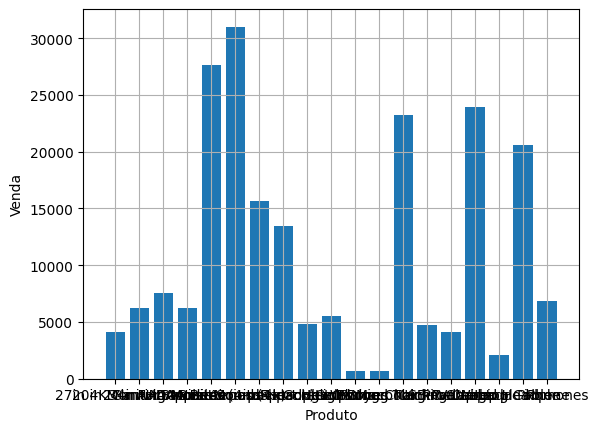

In [62]:
results3 = all_data.groupby('Product')
Quantity_Ordered = results3.sum(numeric_only=True)['Quantity Ordered']


sales = [sale for sale, df in results3]

plt.bar(sales,Quantity_Ordered)
plt.xticks(sales)
plt.grid()
plt.xlabel('Produto')
plt.ylabel('Venda')
plt.show() 

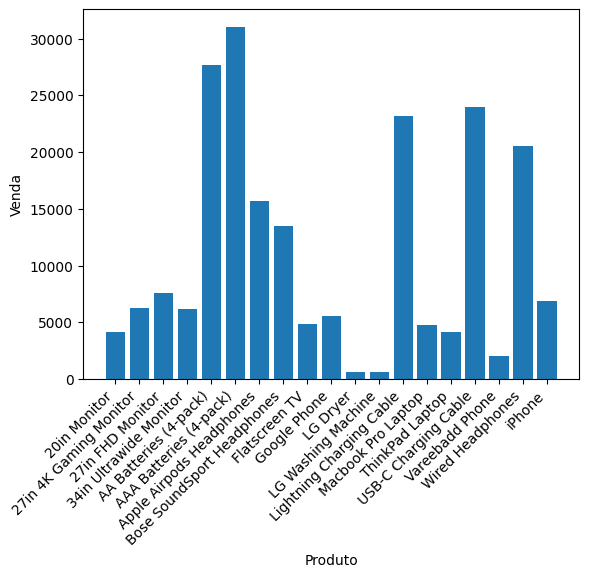

In [66]:
results3 = all_data.groupby('Product').sum(numeric_only=True)
Quantity_Ordered = results3['Quantity Ordered']

products = results3.index

plt.bar(products,Quantity_Ordered)
plt.xticks(products, rotation=45, ha='right')
plt.grid(False)
plt.xlabel('Produto')
plt.ylabel('Venda')
plt.show()

/var/folders/l2/ynd32wzj36vf6_17bh6t4y5r0000gn/T/ipykernel_10219/1312188132.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

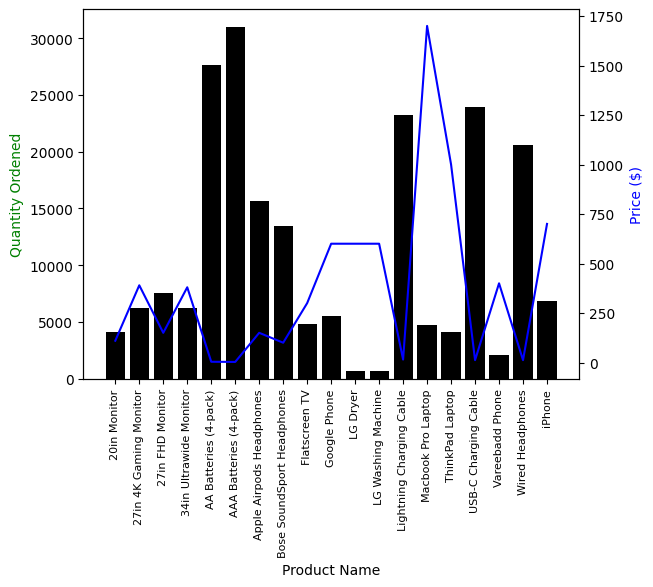

In [83]:
price = all_data.groupby('Product').mean(numeric_only=True)['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,Quantity_Ordered, color='black')
ax2.plot(products,price, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordened',color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)


In [72]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
State                       object
Street                      object
City1                       object
date                        object
time                        object
Hour                         int32
Minute                       int32
dtype: object